In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Loading the dataset

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
# The train sample is 50000, image is 32 by 32 , 3 is RGB

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
#The test sample is 10000, image is 32 by 32 , 3 is RGB

In [ ]:
#Here we see there are 50000 training images and 1000 test images

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
#y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:3]

array([6, 9, 9], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
#Plotting some images to see what they are

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (12,1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

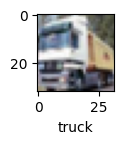

In [ ]:
plot_sample(X_train, y_train, 1)

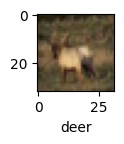

In [ ]:
plot_sample(X_train, y_train, 3)

In [ ]:
#Normalizing the training data

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#Building artificial neural network for image classification on the dataset

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.8180 - accuracy: 0.3520
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.6259 - accuracy: 0.4250
Epoch 3/10
1563/1563 [==============================] - 77s 50ms/step - loss: 1.5453 - accuracy: 0.4529
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4858 - accuracy: 0.4758
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.4335 - accuracy: 0.4951
Epoch 6/10
1563/1563 [==============================] - 77s 50ms/step - loss: 1.3908 - accuracy: 0.5118
Epoch 7/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.3541 - accuracy: 0.5253
Epoch 8/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.3197 - accuracy: 0.5376
Epoch 9/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.2851 - accuracy: 0.5514
Epoch 10/10
1563/1563 [==============================] - 78s 50m

In [ ]:
#we can see that at the end of 10 epochs, accuracy is at around 49% which is very weak by considering the level of the percentage value

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.35      0.48      1000
           1       0.68      0.53      0.60      1000
           2       0.32      0.56      0.41      1000
           3       0.49      0.17      0.25      1000
           4       0.65      0.12      0.20      1000
           5       0.39      0.52      0.44      1000
           6       0.58      0.57      0.58      1000
           7       0.41      0.76      0.53      1000
           8       0.73      0.48      0.58      1000
           9       0.45      0.73      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.54      0.48      0.46     10000
weighted avg       0.54      0.48      0.46     10000



In [ ]:
#Building a convolutional neural network to train our images of the dataset

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.5180 - accuracy: 0.4489
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1602 - accuracy: 0.5903
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0227 - accuracy: 0.6448
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9450 - accuracy: 0.6702
Epoch 5/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.8857 - accuracy: 0.6927
Epoch 6/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.8360 - accuracy: 0.7087
Epoch 7/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7956 - accuracy: 0.7233
Epoch 8/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7569 - accuracy: 0.7369
Epoch 9/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7216 - accuracy: 0.7502
Epoch 10/10
1563/1563 [==============================] - 37s 24m

In [ ]:
#With CNN, at the end 5 epochs, accuracy score was around 70% which is a high level of improvement than ANN classification.
#CNN's are best for image classification and gives superb accuracy.
# Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.8831 - accuracy: 0.7039


[0.8830621838569641, 0.7038999795913696]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[1.0511397e-03, 6.0500415e-06, 9.5743919e-03, 8.8466275e-01,
        9.1312052e-04, 9.9153191e-02, 3.2887941e-03, 6.4418814e-06,
        1.2927020e-03, 5.1434967e-05],
       [9.0635137e-04, 2.6673097e-02, 6.5655058e-07, 5.9520065e-08,
        1.7424977e-08, 1.7664103e-08, 5.8290484e-09, 1.3123417e-08,
        9.7230220e-01, 1.1765069e-04],
       [7.1018398e-02, 9.5889084e-02, 4.3646255e-04, 7.7162539e-03,
        2.0474505e-03, 7.2080398e-04, 1.2270594e-04, 1.1611701e-03,
        7.9145473e-01, 2.9432943e-02],
       [9.1180938e-01, 4.7214560e-02, 4.6917396e-03, 7.0686918e-05,
        2.8510799e-04, 1.3215623e-05, 1.8588548e-04, 1.1804455e-05,
        3.5341330e-02, 3.7632248e-04],
       [8.9702957e-07, 8.7804256e-07, 3.4303511e-03, 3.9840639e-02,
        5.8312690e-01, 4.0135095e-03, 3.6957827e-01, 2.7460987e-06,
        5.4976872e-06, 2.2559030e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

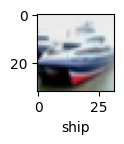

In [ ]:
plot_sample(X_test, y_test,1)

In [ ]:
classes[y_classes[3]]

'airplane'

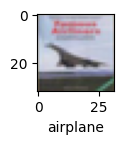

In [ ]:
plot_sample(X_test, y_test,3)